In [1]:
%load_ext autoreload
%autoreload 2
import siren
from HNL import get_decay_length,time_delay
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
N = 50
Urange = np.logspace(-15,0,N)
mrange = np.logspace(0,3,N)
energies = np.logspace(2,np.log10(5e3),20)

decay_lengths = {E:np.zeros((N,N)) for E in energies}
time_delays = {E:np.zeros((N,N)) for E in energies}

for iu,U in enumerate(Urange):
    for im,m in enumerate(mrange):
        for energy in energies:
            if energy>m:
                decay_lengths[energy][im,iu] = get_decay_length(m,Ue4=np.sqrt(U),Umu4=0,Utau4=0,energy=energy)
                time_delays[energy][im,iu] = time_delay(energy,m,decay_lengths[energy][im,iu])
            else:
                decay_lengths[energy][im,iu] = 0
                time_delays[energy][im,iu] = 0
        

1.64969e-28 PiPlus 6.4304e-29KPlus 3.4358e-30RhoPlus 1.08733e-28KPrimePlus 2.97627e-30DPlus 0DsPlus 01.79449e-28
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
1.64969e-28 PiPlus 6.4304e-29KPlus 3.4358e-30RhoPlus 1.08733e-28KPrimePlus 2.97627e-30DPlus 0DsPlus 01.79449e-28
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
1.64969e-28 PiPlus 6.4304e-29KPlus 3.4358e-30RhoPlus 1.08733e-28KPrimePlus 2.97627e-30DPlus 0DsPlus 01.79449e-28
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
1.64969e-28 PiPlus 6.4304e-29KPlus 3.4358e-30RhoPlus 1.08733e-28KPrimePlus 2.97627e-30DPlus 0DsPlus 01.79449e-28
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
0 PiPlus 0KPlus 0RhoPlus 0KPrimePlus 0DPlus 0DsPlus 00
1.64969e-28 PiPlus 6.4304e-29KPlus 3.4358e-30RhoPlus 1.08733e-28KPrimePlus 2.97627e-30DPlus 0DsPlus 01.79449


KeyboardInterrupt



In [ ]:
for energy in energies:
    #plt.pcolor(mrange,Urange,decay_lengths[energy].T,norm=LogNorm(vmin=1e-10,vmax=1e10),cmap="Purples")
    #plt.colorbar()
    levels = [1,1e1,1e2,1e3]
    colors = ["red","blue","green","purple"]
    plt.contour(mrange,Urange,decay_lengths[energy].T,
                levels=levels,colors=colors)
    for level,color in zip(levels,colors):
        plt.plot([],[],color=color,label=r"$L_{\rm dec} = 10^%d$ m"%np.log10(level))
    plt.contour(mrange,Urange,time_delays[energy].T,
                levels=[1,1e1,1e2,1e3],colors=["red","blue","green","purple"],linestyles="--")
    for level,color in zip(levels,colors):
        plt.plot([],[],color=color,label=r"$\Delta t = 10^%d$ ns"%np.log10(level),ls="--")
    plt.loglog()
    plt.xlabel(r"$m_4$ / GeV",fontsize=14) 
    plt.ylabel(r"$|U_{\mu 4}|^2$",fontsize=14) 
    plt.legend(ncol=2,title=r"$E_\nu = %1.1f$ GeV"%energy)
    plt.savefig("Figures/HNL/TimeDelays_%2.2e.png"%energy,dpi=100)
    #plt.show()
    plt.clf()
    #break

In [ ]:
import imageio
with imageio.get_writer("Figures/HNL/TimeDelays.gif", mode='I') as writer:
    for energy in energies:
        filename = "Figures/HNL/TimeDelays_%2.2e.png"%energy
        image = imageio.imread(filename)
        writer.append_data(image)

In [17]:
import pandas as pd
from MuonSimulationHelpers import get_flux_data
data = get_flux_data("LHC13","EPOSLHC","light")
datac = get_flux_data("LHC13","BKRS","charm")

,PDG,hPDG,x0,y0,z0,thx,thy,E,wgt,px,py,pz
0,-14.0,-211.0,-0.127,-0.010,10.999,-0.000266,-0.000012,47.291,1094.4,-0.012580,-0.000561,47.290998
1,-12.0,310.0,-0.253,-0.460,5.999,-0.000491,-0.000968,22.393,1094.4,-0.011002,-0.021683,22.392987
2,14.0,211.0,0.382,-0.216,2.999,0.000796,-0.000455,63.981,1094.4,0.050933,-0.029104,63.980973
3,14.0,321.0,0.333,0.005,18.999,0.000742,-0.000012,160.650,1094.4,0.119228,-0.001988,160.649956
4,-14.0,-211.0,0.011,-0.054,10.999,0.000021,-0.000111,118.390,1094.4,0.002516,-0.013116,118.389999
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,14.0,321.0,0.204,0.228,8.999,0.000403,0.000512,43.435,1094.4,0.017490,0.022224,43.434991
199996,14.0,130.0,0.275,0.011,45.999,0.000622,0.000044,130.950,1094.4,0.081393,0.005788,130.949975
199997,14.0,211.0,0.084,-0.409,17.999,0.000143,-0.000865,32.519,1094.4,0.004666,-0.028134,32.518987
199998,14.0,211.0,-0.240,-0.310,19.999,-0.000529,-0.000642,40.991,1094.4,-0.021670,-0.026312,40.990986


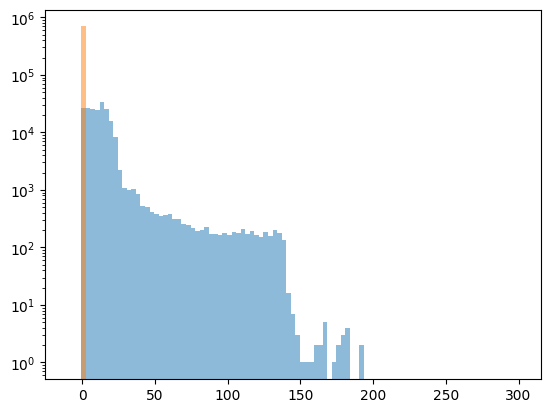

In [22]:
zbins = np.linspace(-10,300,100)
plt.hist(data["z0"],bins=zbins,alpha=0.5)
plt.hist(datac["z0"],bins=zbins,alpha=0.5)
plt.semilogy()
data

In [ ]:
import rundec
crd = rundec.CRunDec()
alpha_s = crd.AlphasExact(alpha_s_ref,m_ref,m_N,nf,nl)